# An overview of SVM with case study

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import precision_recall_fscore_support

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# load data into a pandas dataframe
data = pd.read_csv('drive/My Drive/Colab Notebooks/project/liverLabTrain.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Preprocessing Data

### Removing Duplicates

In [0]:
data.shape

(472, 11)

In [0]:
data_duplicate = data[data.duplicated(keep = False)]
data_duplicate

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
12,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
13,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
20,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
21,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
41,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
42,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
48,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
49,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
92,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,0
93,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,0


In [0]:
data = data[~data.duplicated(subset = None, keep = 'first')]
data.shape

(472, 11)

### Checking all null values

In [0]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Liver_Disease                 0
dtype: int64

In [0]:
print ("Length before removing NaN values:%d"%len(data))
data1 = data[pd.notnull(data['Albumin_and_Globulin_Ratio'])]
print ("Length after removing NaN values:%d"%len(data1))

Length before removing NaN values:472
Length after removing NaN values:469


### Printing rows with null values

In [0]:
data[~pd.notnull(data['Albumin_and_Globulin_Ratio'])]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
158,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
192,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,0
251,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,0


### Visualization during preprocessing

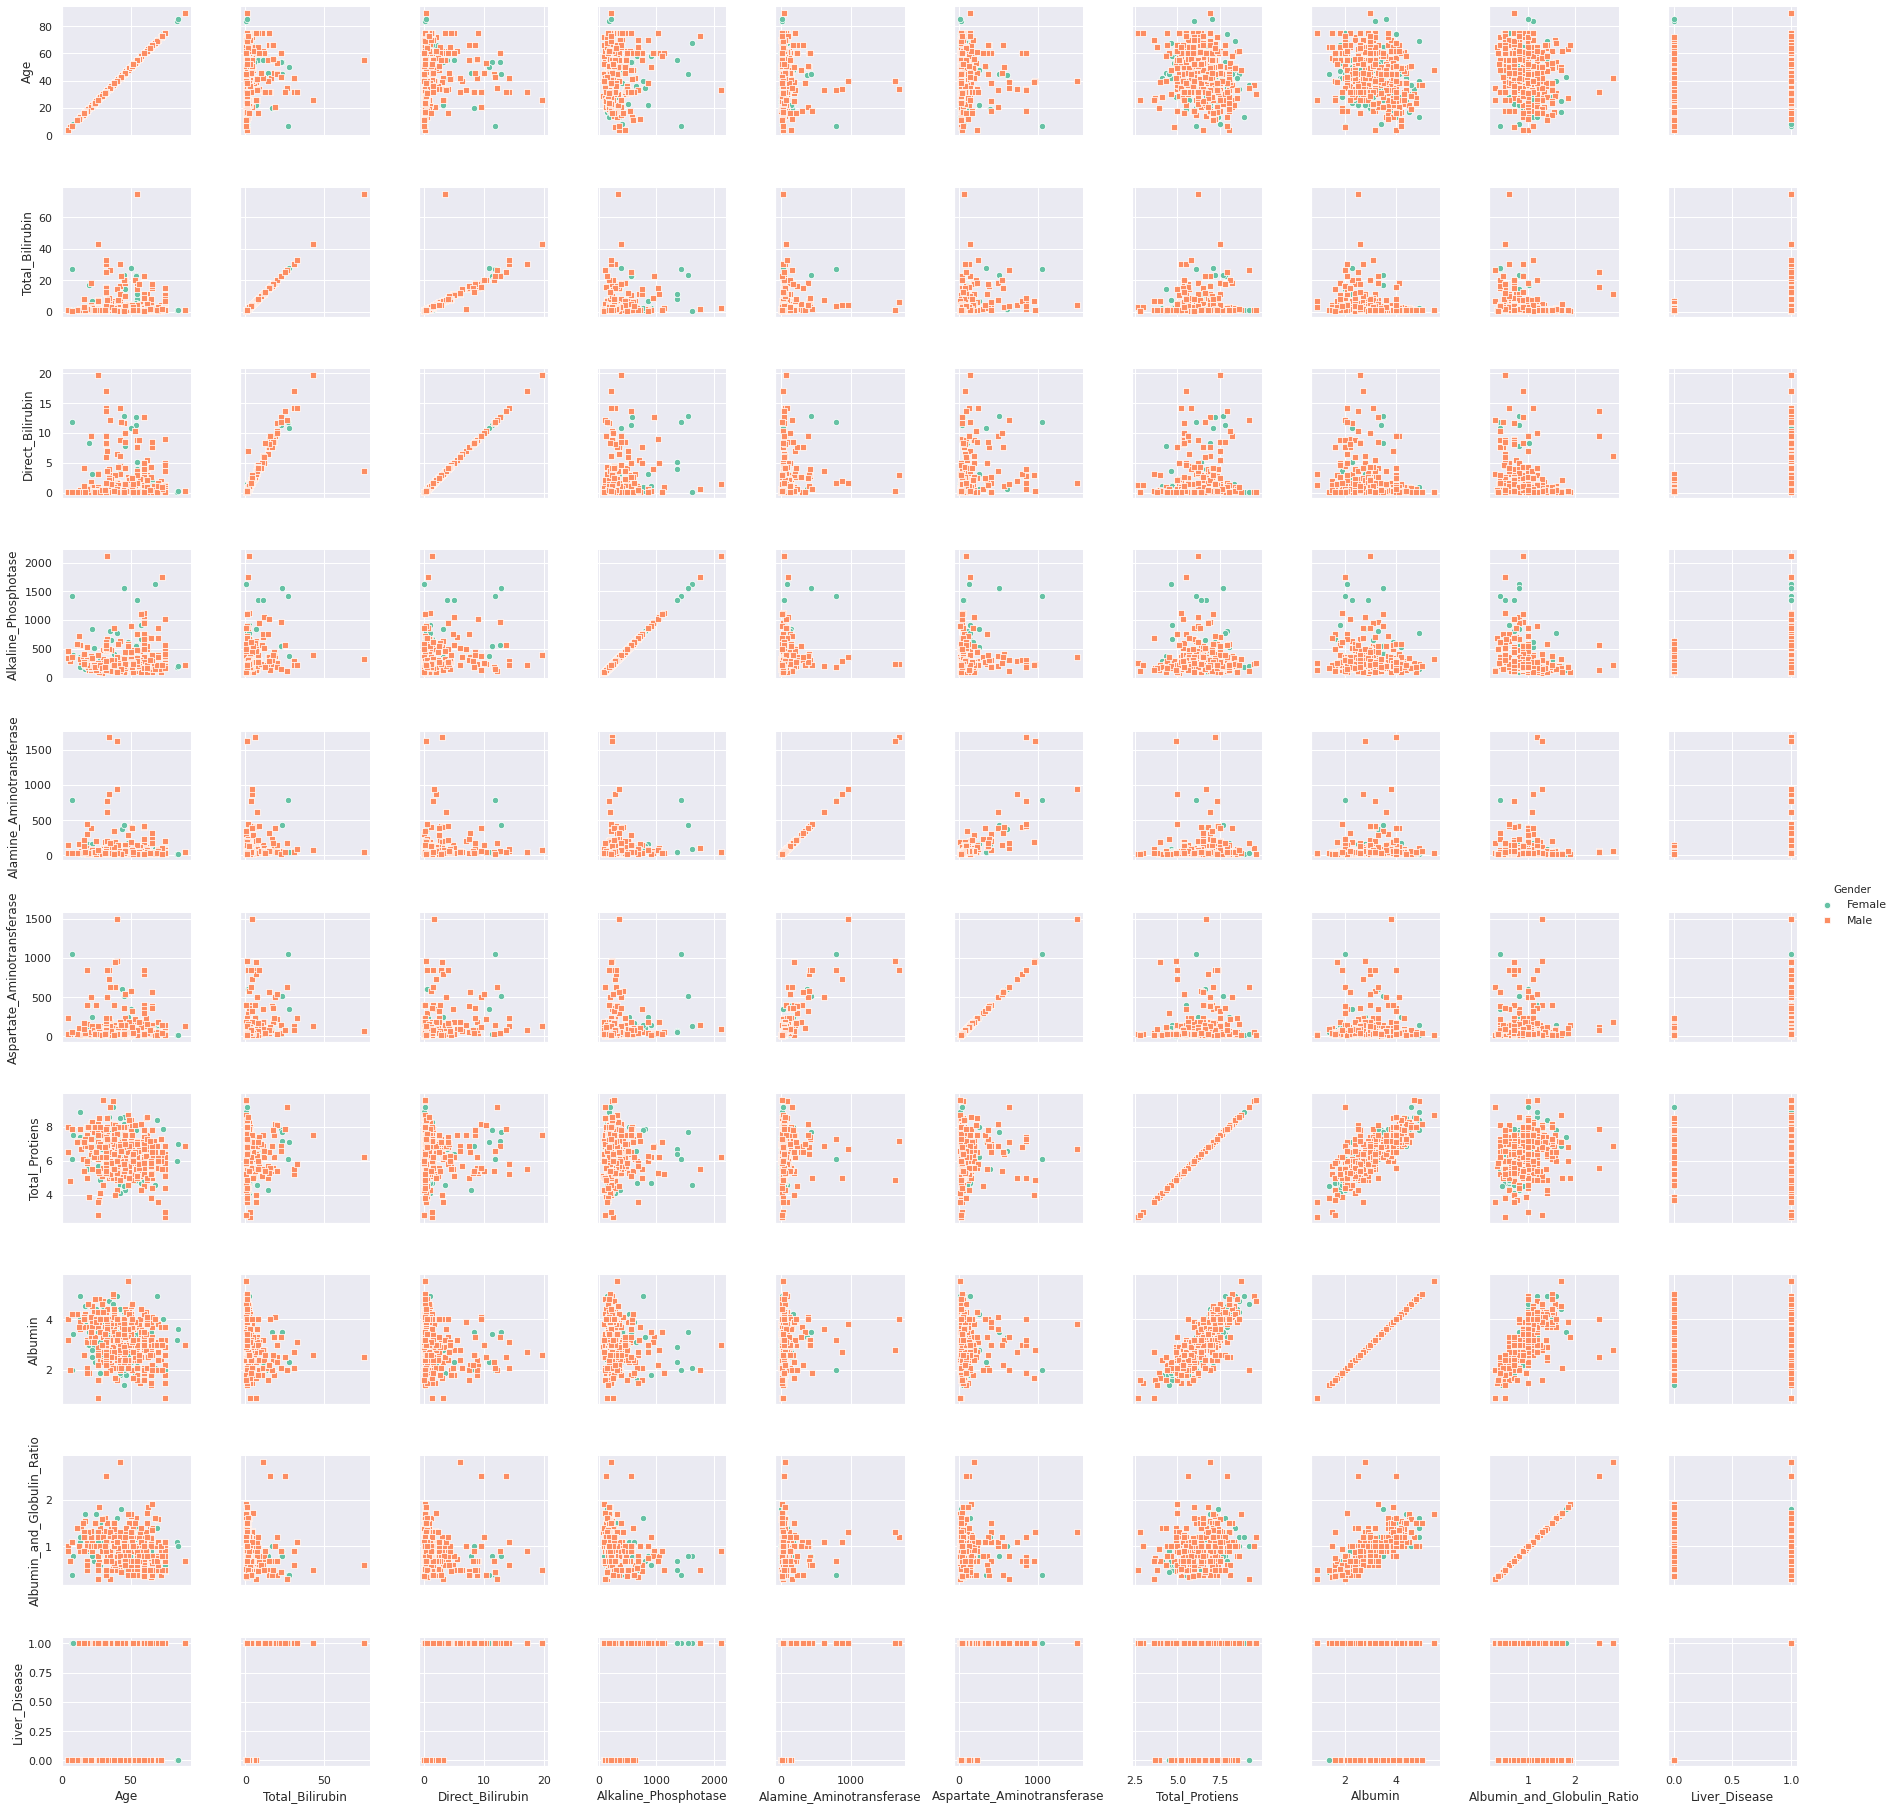

In [0]:
g = sns.PairGrid(data = data, hue = 'Gender', palette="Set2", hue_kws={"marker": ["o", "s"]})
g = g.map(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()

### Substituting the NaN value with mean value of the 'Albumin_and_Globulin_Ratio' column

In [0]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode().iloc[0])
data['Albumin_and_Globulin_Ratio'].unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 0.5 , 0.6 , 1.85, 1.2 ,
       0.95, 1.4 , 0.8 , 1.18, 0.61, 1.34, 0.7 , 1.39, 1.6 , 1.58, 1.25,
       0.78, 0.76, 1.55, 0.71, 0.62, 1.5 , 1.66, 0.96, 1.38, 0.52, 0.47,
       0.93, 0.48, 1.06, 0.53, 0.75, 1.03, 0.68, 1.9 , 1.7 , 1.8 , 0.97,
       0.92, 0.3 , 0.35, 1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72,
       1.16, 2.8 , 0.46, 0.39, 1.02, 2.5 , 0.37])

In [0]:
data['Albumin_and_Globulin_Ratio'].value_counts()

1.00    91
0.70    49
0.80    49
0.90    46
1.10    34
        ..
0.46     1
0.61     1
0.39     1
0.88     1
0.89     1
Name: Albumin_and_Globulin_Ratio, Length: 62, dtype: int64

In [0]:
print(data['Albumin_and_Globulin_Ratio'].median())
print(data['Albumin_and_Globulin_Ratio'].mean())

1.0
0.9545338983050845


# Log transform

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc68639f5f8>,
      dtype=object)

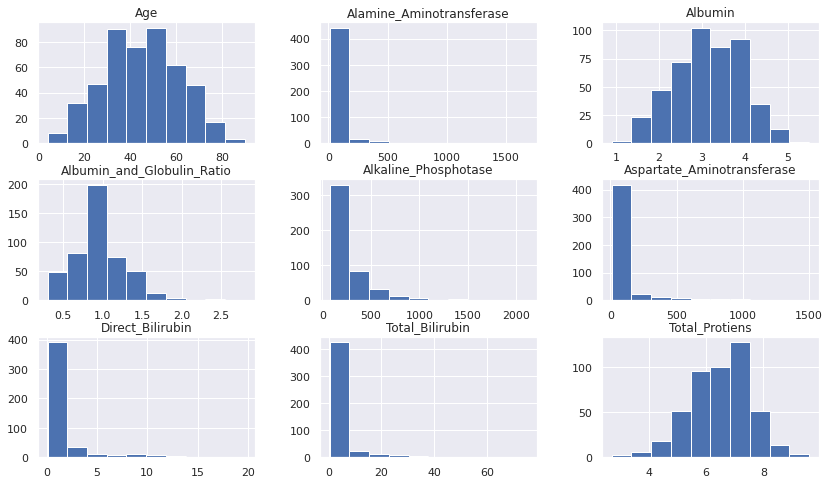

In [0]:
disease_initial = data['Liver_Disease']
features_initial = data.drop('Liver_Disease', axis = 1)

features_initial.hist(figsize=(14,8))

# Visualization

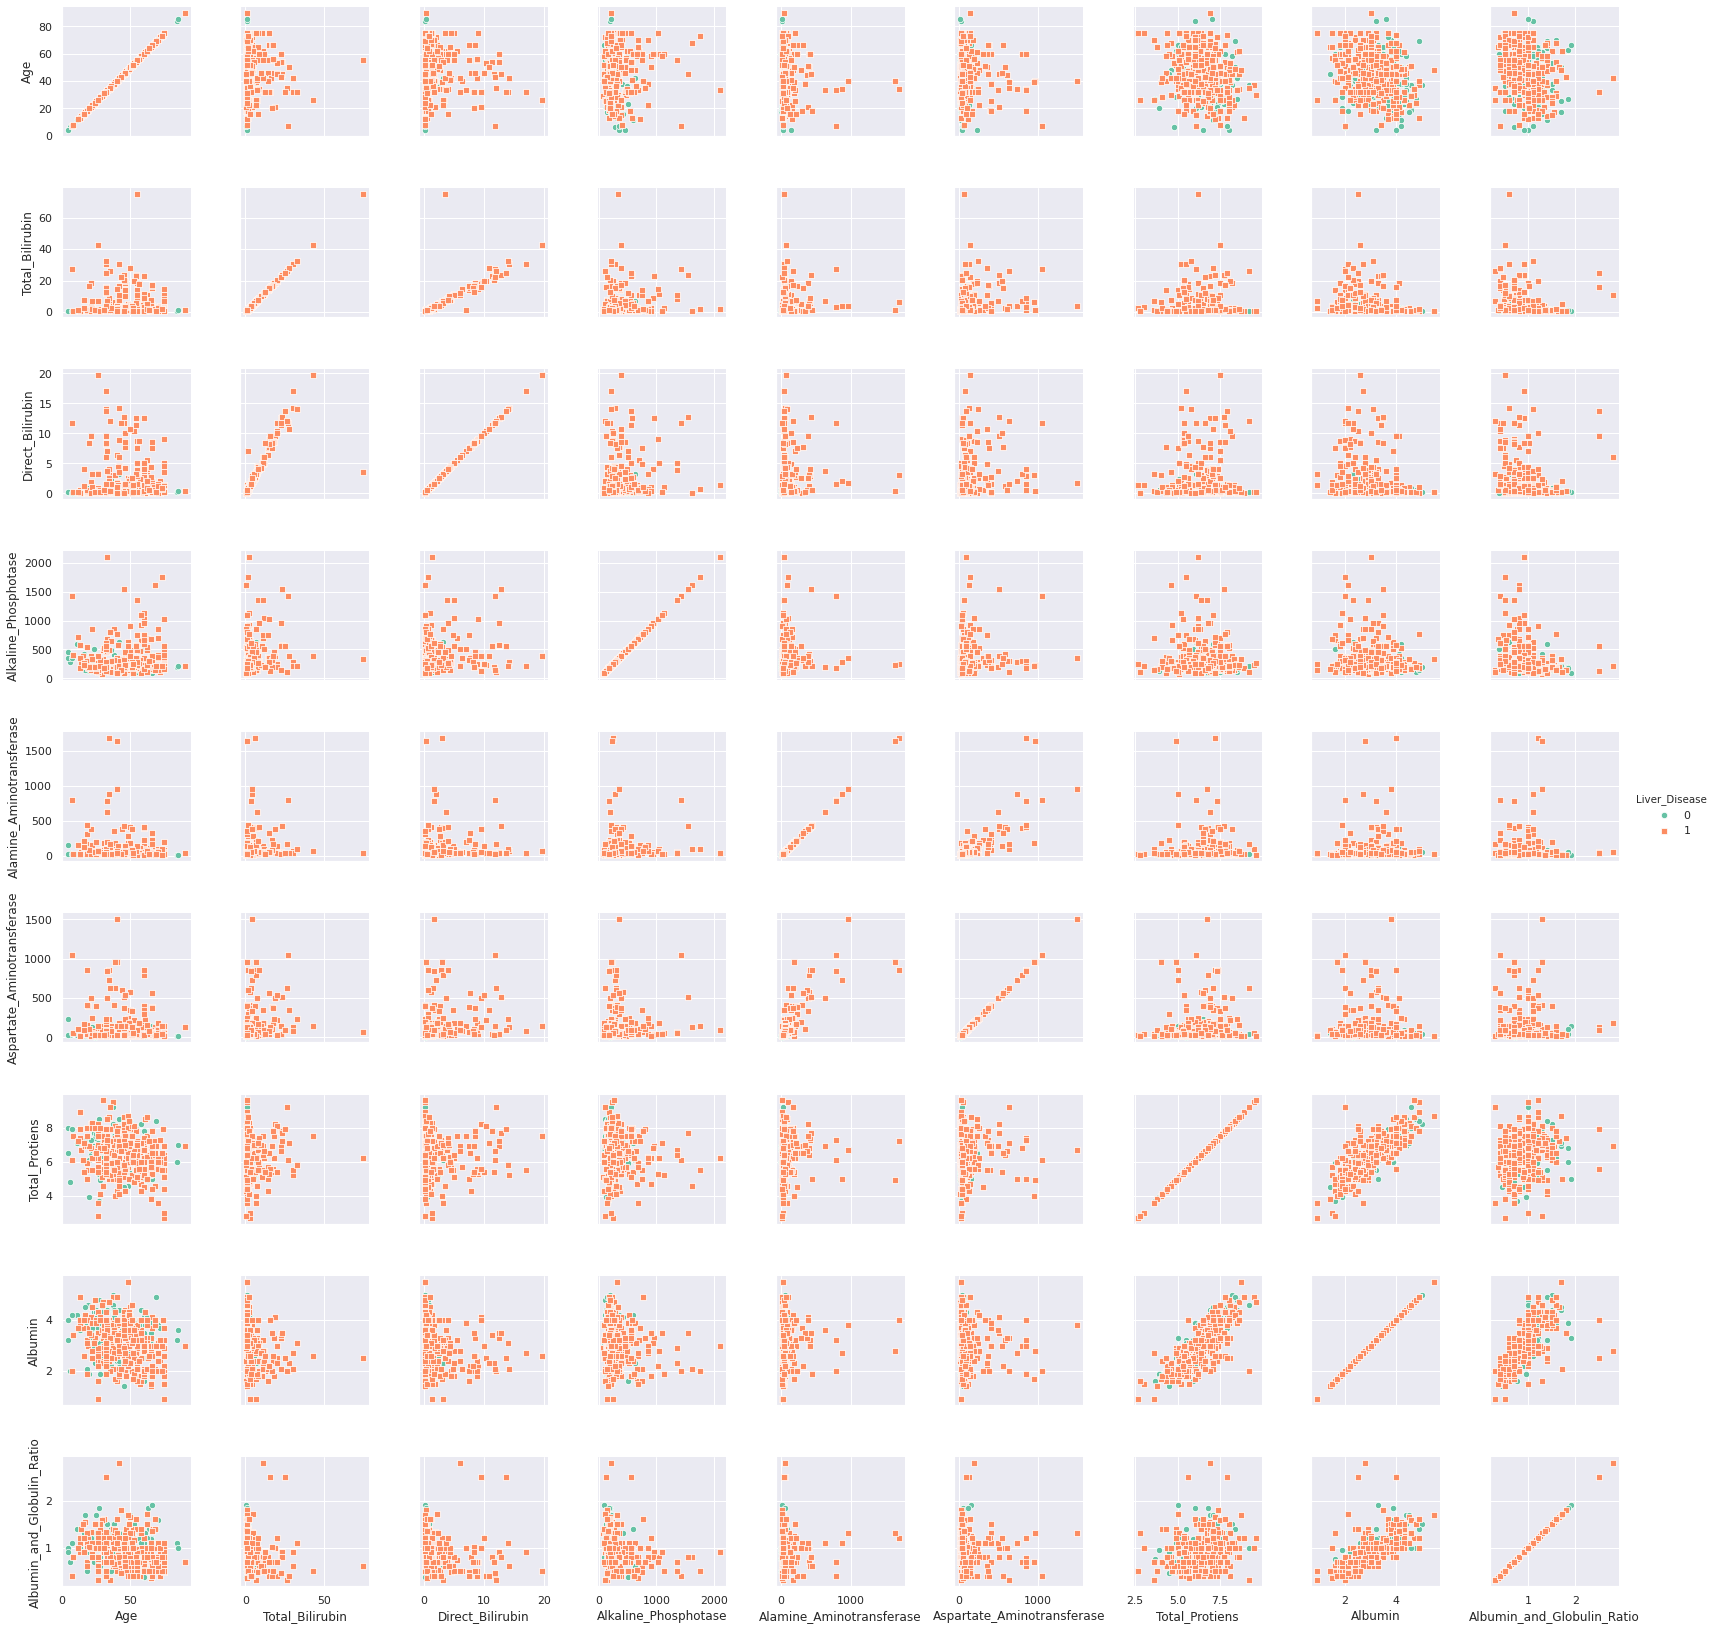

In [0]:
g = sns.PairGrid(data = data, hue = 'Liver_Disease', palette="Set2", hue_kws={"marker": ["o", "s"]})
g = g.map(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()

# Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized = ['Age', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Alkaline_Phosphotase', 'Albumin', 'Direct_Bilirubin', 'Total_Bilirubin', 'Albumin_and_Globulin_Ratio', 'Total_Protiens']
skewed = ['Albumin', 'Direct_Bilirubin', 'Total_Bilirubin', 'Albumin_and_Globulin_Ratio', 'Total_Proteins']
features_initial[normalized] = scaler.fit_transform(data[normalized])

display(features_initial.describe())

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,0.474182,0.039096,0.070121,0.104995,0.036541,0.056363,0.549343,0.489269,0.261814
std,0.190030,0.086053,0.143274,0.115246,0.087291,0.110378,0.158517,0.173474,0.130280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337209,0.005362,0.005102,0.049017,0.007784,0.010067,0.449275,0.369565,0.160000
50%,0.476744,0.008043,0.010204,0.064373,0.013772,0.020470,0.565217,0.478261,0.280000
75%,0.619186,0.028485,0.057398,0.109582,0.028743,0.048490,0.652174,0.630435,0.320000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Categorical features - (Preparing data for model)

In [0]:
features = pd.get_dummies(features_initial)

encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)

disease=pd.get_dummies(disease_initial)
encoded = list(disease.columns)
print ("{} disease columns after one-hot encoding.".format(len(encoded)))

11 total features after one-hot encoding.
['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Gender_Female', 'Gender_Male']
2 disease columns after one-hot encoding.


In [0]:
from sklearn.model_selection import train_test_split, ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(features, disease[1], test_size = 0.2, random_state = 9)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 377 samples.
Testing set has 95 samples.


# Modelling

### Baseline Predictor

In [0]:
# disease means '1', healthy means '0'
disease = disease[:][1]

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#naive accuracy, assuming that we predict everyone has disease
positive_disease= (data['Liver_Disease'] == 1)
positive_disease.astype(int) # convert boolean array to float
report = classification_report(positive_disease, disease)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       133
        True       1.00      1.00      1.00       339

    accuracy                           1.00       472
   macro avg       1.00      1.00      1.00       472
weighted avg       1.00      1.00      1.00       472



# SVM Trainning and Prediction

Support Vector Machine: SVM aims to find an optimal hyperplane that separates the data into different classes.

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import make_scorer

In [0]:
from sklearn.metrics import fbeta_score, accuracy_score
import datetime

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}

    start = datetime.datetime.now()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = datetime.datetime.now()
    
    results['train_time'] = end - start
        
    start = datetime.datetime.now() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:200])
    end = datetime.datetime.now()
    
    results['pred_time'] = end - start
    results['acc_train'] = accuracy_score(y_train[:200],predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    results['f_train'] = fbeta_score(y_train[:200],predictions_train,beta=2)
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=2)
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    return results

In [0]:
clf_SVM = SVC(random_state=9)
samples = int(len(X_train) )
results = train_predict(clf_SVM, samples, X_train, y_train, X_test, y_test)

SVC trained on 377 samples.


### Receiver Operating Characteristic Curve

It plots the curve of True Positive Rate vs the False positive Rate, with a greater area under the curve indicating a better True Positive Rate for the same False Positive Rate.

This can be helpful in this case as simply knowing the number of correct predictions may not suffice.

For classifier Support Vector Classification, ROC score is 0.500000


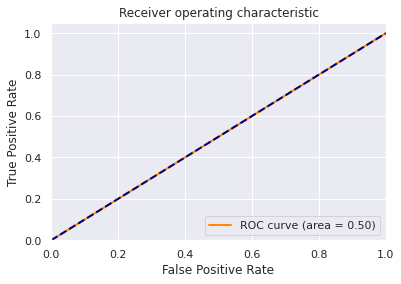

In [0]:
pred=clf_SVM.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print("For classifier %s, ROC score is %f" % ("Support Vector Classification",roc_auc))
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Fine Tuning the Models

Using the grid search method to see if we can improve the performance of various models with different values for the given hyperparameters.

In [0]:
parameters={'kernel':['poly','rbf','linear'], 'C':[0.001,1,1000]} 
scorer = make_scorer(fbeta_score, beta=2)
_grid_object = GridSearchCV(clf_SVM,parameters,scoring=scorer)
_grid_fit = _grid_object.fit(X_train,y_train)
_best_clf_SVM = _grid_fit.best_estimator_
prediction = (clf_SVM.fit(X_train, y_train)).predict(X_test)
best_prediction = _best_clf_SVM.predict(X_test)

For classifier Support Vector Classification:
Unoptimized model
------
Accuracy score on testing data: 0.7579
F-score on testing data: 0.9399

Optimized Model
------
Final accuracy score on the testing data: 0.7579
Final F-score on the testing data: 0.9399
Best parameters:
{'C': 0.001, 'kernel': 'poly'}
For classifier Support Vector Classification, ROC score is 0.500000 




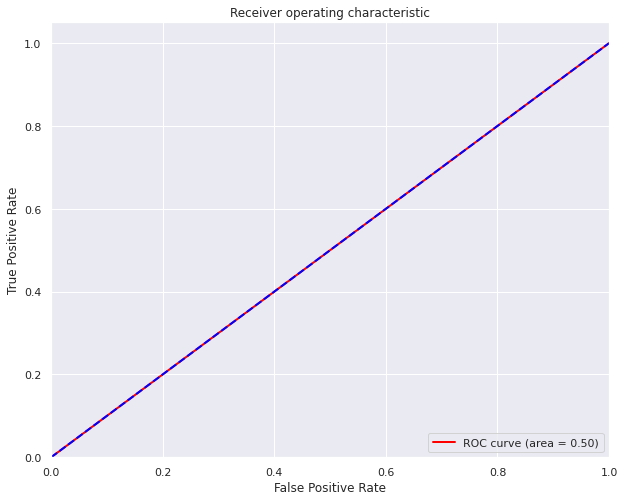

In [0]:
print('For classifier %s:' % ("Support Vector Classification"))
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, prediction)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, prediction, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_prediction)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_prediction, beta = 2)))
print("Best parameters:")
print(_grid_fit.best_params_)
fpr, tpr, _ = roc_curve(y_test, best_prediction)
roc_scores = auc(fpr, tpr)
print("For classifier %s, ROC score is %f \n\n" % ("Support Vector Classification",roc_scores))
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve (area = %0.2f)' % roc_scores)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

F-beta score (0.9399), but its area under the ROC curve is surprisingly low.